In [41]:
# Imports
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
import seaborn as sns

import random

from elo import *

from sklearn.preprocessing import LabelEncoder
sns.set_style("darkgrid")
sns.set_context("notebook")

#_________________________________________________________


#____________________________________________________________

s = System()

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#SET VARIABLES FROM HERE
# Add players
playercount = 30
#size of item pool
itemcount = 7500
#nr of items each player is given = nr of matches
itemnr = 5000
#scenario -1 = random, 0 = perfect, 1 = range
r = -1

earlystop = False

# Add Classes
s.addClass("a", 1000)

# Data for output
dataRand = []
dataPerf = []
dataRang = []
    
# Add players for each class
for p in range(playercount):
    s.addPlayer(str(p), "a", s.getClass("a").startrating)

# Generate question list (mean, std dev, amount)
itemdist = np.random.normal(1000, 300, itemcount)
for i in range(itemcount):
    s.addItem(str(i), rating=itemdist[i])

# Simulation method (adaptability range (-1 all random, 0 all adaptive))
def simulate(r):  
    # Clear output
    dataRand = []
    dataPerf = []
    dataRang = []
    print("scenario: " + str(r))
    print("playercount: " + str(playercount))
    print("itempool: " + str(itemcount))
    print("#items: " + str(itemnr))
    for p in range(playercount):
        print("Still going! At:", p * 3.333, "%", datetime.datetime.now())
        for i in range(itemnr):
            if r == -1:
                no_adaptivity(p, i)
            elif r == 0:
                perfect_adaptivity(p, i)
                if earlystop:
                    break
            else:
                range_adaptivity(p, i)
                if earlystop:
                    break
    print("Done!", datetime.datetime.now())

def no_adaptivity(p, q):
    item = s.getItem(str(np.random.randint(0, itemcount)))
    player = s.getPlayer(str(p))
    s.game(player.name, item.name)
    dataRand.append([player.name, s.getPlayerRating(str(p)), q])
    #earlystop = False


def perfect_adaptivity(p, q):
    player = s.getPlayer(str(p))
    earlystop = True
    for i in range(itemcount):
        chance = np.round(s.getPlayer(str(p)).compareRating(s.getPlayer(str(p)), s.getItem(str(i))), 1)
        if chance == 0.5:
            itemmatch = s.getItem(str(i))
            s.game(player.name, itemmatch.name)
            dataPerf.append([player.name, s.getPlayerRating(str(p)), q])
            earlystop = False
            break

            
def range_adaptivity(p, q):
    player = s.getPlayer(str(p))
    earlystop = True
    for i in range(itemcount):
        item = s.getItem(str(i))
        chance = np.round(s.getPlayer(str(p)).compareRating(s.getPlayer(str(p)), item), 2)
        if chance > 0.15 and chance < 0.85:
            s.game(player.name, item.name)
            dataRang.append([player.name, s.getPlayerRating(str(p)), q])
            earlystop = False
            break

In [42]:
# Run simulation for all methods, create dataframes and write them to csv

#simulate(-1)
#dfRand = pd.DataFrame(dataRand, columns = ['Player', 'Elo', '#Questions'])
#dfRand.info()
#dfRand.to_csv('outrandV2')

simulate(0)
dfPerf = pd.DataFrame(dataPerf, columns = ['Player', 'Elo', '#Questions'])
dfPerf.to_csv('outperfect30-5000-75000')
#dfPerf.info()

simulate(300) #213 min
dfRang = pd.DataFrame(dataRang, columns = ['Player', 'Elo', '#Questions'])
dfRang.to_csv('outperfect30-5000-75000')
#dfRang.info()

scenario: 0
playercount: 30
itempool: 7500
#items: 5000
Still going! At: 0.0 % 2021-10-28 21:54:41.455837


KeyboardInterrupt: 

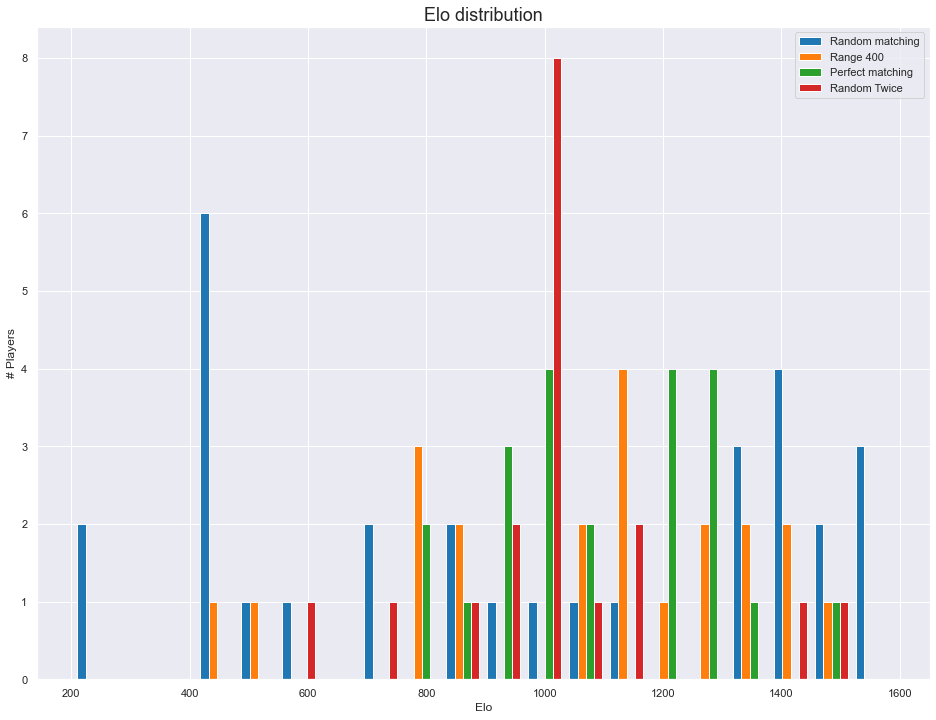

In [65]:
from matplotlib import figure

#This produces the Time Series Graphs as in the google drive
# Change dfR to dfAc or dfPer
dfR = pd.read_csv('outrandNORMAL')
df4 = pd.read_csv('outrang4')
df2 = pd.read_csv('outrang2')
dfP = pd.read_csv('outperf.csv')
dfR2 = pd.read_csv('outrand')
#dfR.drop(dfR.tail(2000).index,inplace=True)

dfR2Sort = dfR2.groupby(['#Questions'], sort=False)['Elo'].mean()
#dfR2Sort2 = dfR2.groupby(['#Questions'], sort=False)['Elo'].min()
#dfR2Sort3 = dfR2.groupby(['#Questions'], sort=False)['Elo'].max()

dfSort = dfR.groupby(['#Questions'], sort=False)['Elo'].mean()
#dfSort2 = dfR.groupby(['#Questions'], sort=False)['Elo'].min()
#dfSort3 = dfR.groupby(['#Questions'], sort=False)['Elo'].max()

dfRS41 = df4.groupby(['#Questions'], sort=False)['Elo'].mean()
#dfRS42 = df4.groupby(['#Questions'], sort=False)['Elo'].min()
#dfRS43 = df4.groupby(['#Questions'], sort=False)['Elo'].max()

dfRS21 = df2.groupby(['#Questions'], sort=False)['Elo'].mean()
#dfRS22 = df2.groupby(['#Questions'], sort=False)['Elo'].min()
#dfRS23 = df2.groupby(['#Questions'], sort=False)['Elo'].max()

dfP1 = dfP.groupby(['#Questions'], sort=False)['Elo'].mean()
#dfP2 = dfP.groupby(['#Questions'], sort=False)['Elo'].min()
#dfP3 = dfP.groupby(['#Questions'], sort=False)['Elo'].max()

#dfRSort = dfR[dfR['Player'] % 10 == 0]
#df4Sort = df4[df4['Player'] % 3 == 0]
#df2Sort = df2[df2['Player'] % 3 == 0]
#dfPSort = dfP[dfP['Player'] % 3 == 0]
#dfR2Sort = dfR2[dfR2['Player'] % 3 == 0]

fig, ax = plt.subplots(figsize=(16, 12))
#plt.ylim(150, 1800)
#plt.xlim(0, 3000)
#dfSort.plot(ax=ax)
#dfR2Sort.groupby('Player').plot(y = 'Elo', x = '#Questions', ax=ax)
#ax.set_xlabel('Question')
#ax.set_ylabel('Elo')
#ax.set_title('Every 3rd player, random matching, every question twice', fontsize='18')
#plt.legend()
#plt.show()

#dfRSort = dfR.loc[(dfR['#Questions'] == 3500) & (dfR['Player'] < 30)]
#dfRSort = dfRSort['Elo']
#dfRSort = dfRSort.round(0)
#df4Sort = df4.loc[(df4['#Questions'] == 2500)]
#df4Sort = df4Sort['Elo']
#dfRSort = df4Sort.round(0)
#df2Sort = df2.loc[(df2['#Questions'] == 300)]
#df2Sort = df2Sort['Elo']
#dfPSort = dfP.loc[(dfP['#Questions'] == 1100)]
#dfPSort = dfPSort['Elo']
#dfR2Sort = dfR2.loc[(dfR['#Questions'] == 3000)]
#dfR2Sort = dfR2Sort['Elo']
#dfRSort = dfPSort.round(0)
#plt.hist([dfRSort, df4Sort, dfPSort, dfR2Sort], bins=20, label=['Random matching', 'Range 400', 'Perfect matching', 'Random Twice'])
#plt.hist(df4Sort, bins=20, alpha=0.5, label='Range 400')
#plt.hist(df2Sort, bins=50, label='Range 200')
#plt.hist(dfPSort, bins=20, alpha=0.5, label='Perfect')

#plt.plot(dfR2Sort)
#plt.plot(dfSort, color='orange', label='Random')
#plt.plot(dfSort3, color='orange')
#plt.plot(dfRS41, color='green', label='Range, 400')
#plt.plot(dfRS43, color='green')
#plt.plot(dfRS21, color='red', label='Range, 200')
#plt.plot(dfRS23, color='red')
#plt.plot(dfP1, color='blue', label='Perfect adaptation')
#plt.plot(dfP3, color='blue')
#plt.plot(dfR2Sort, color='purple', label='RandomTwice')
#plt.plot(dfR2Sort2, color='orange', label='RandomTwice')
#plt.plot(dfR2Sort3, color='orange')


ax.set_xlabel('Elo')
ax.set_ylabel('# Players')
ax.set_title('Elo distribution', fontsize='18')
plt.legend()
plt.show()

In [ ]:
dfR = pd.read_csv('outrandNORMAL')
df4 = pd.read_csv('outrang4')
df2 = pd.read_csv('outrang2')
dfP = pd.read_csv('outperf.csv')
dfR2 = pd.read_csv('outrand')

dfRSort = dfR[dfR['Player'] % 10 == 0]
df4Sort = df4[df4['Player'] % 3 == 0]
df2Sort = df2[df2['Player'] % 3 == 0]
dfPSort = dfP[dfP['Player'] % 3 == 0]
dfR2Sort = dfR2[dfR2['Player'] % 3 == 0]

for index, row in dfR.iterrows():